In [31]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas
import plotly.express as px
from windrose import WindroseAxes

In [32]:
site_list = ['Albemarle', 'Boulmer', 'Charterhall', 'Gogarbank', 'Leuchars', 'Redesdale']

# 'Penmanshiel'

df_P_2016 = pandas.read_excel(f'./datasets/Penmanshiel.xlsx' , sheet_name=0)
df_P_2017 = pandas.read_excel(f'./datasets/Penmanshiel.xlsx' , sheet_name=1)


df_A_2016 = pandas.read_excel(f'./datasets/{site_list[0]}.xlsx' , sheet_name=9)
df_A_2017 = pandas.read_excel(f'./datasets/{site_list[0]}.xlsx' , sheet_name=10)

df_B_2016 = pandas.read_excel(f'./datasets/{site_list[1]}.xlsx' , sheet_name=4)
df_B_2017 = pandas.read_excel(f'./datasets/{site_list[1]}.xlsx' , sheet_name=5)

df_C_2016 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=3)
df_C_2017 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=4)

df_G_2016 = pandas.read_excel(f'./datasets/{site_list[3]}.xlsx' , sheet_name=3)
df_G_2017 = pandas.read_excel(f'./datasets/{site_list[3]}.xlsx' , sheet_name=4)

df_L_2016 = pandas.read_excel(f'./datasets/{site_list[4]}.xlsx' , sheet_name=3)
df_L_2017 = pandas.read_excel(f'./datasets/{site_list[4]}.xlsx' , sheet_name=4)

df_R_2016 = pandas.read_excel(f'./datasets/{site_list[5]}.xlsx' , sheet_name=3)
df_R_2017 = pandas.read_excel(f'./datasets/{site_list[5]}.xlsx' , sheet_name=4)


In [33]:
df_A_2016

,ob_end_time,mean_wind_dir (degrees),mean_wind_speed (knots)
0,2016-01-01 00:00:00,250.0,10.0
1,2016-01-01 01:00:00,250.0,7.0
2,2016-01-01 02:00:00,250.0,6.0
3,2016-01-01 03:00:00,220.0,4.0
4,2016-01-01 04:00:00,230.0,4.0
...,...,...,...
8774,2016-12-31 20:00:00,240.0,8.0
8775,2016-12-31 21:00:00,240.0,6.0
8776,2016-12-31 22:00:00,250.0,5.0
8777,2016-12-31 23:00:00,270.0,6.0


In [34]:
# standardising column names 

list_df = [df_A_2016, df_A_2017,  df_B_2016, df_B_2017, df_C_2016, df_C_2017, df_G_2016, df_G_2017, df_L_2016, df_L_2017, df_R_2016, df_R_2017]

# P has different columns

for df in list_df:
    df.columns = ['datetime', 'mean_wind_dir', 'mean_speed_knots']


df_P_2016.columns = ['datetime', 'mean_speed_ms', 'speed_std', 'mean_wind_dir']
df_P_2017.columns = ['datetime', 'mean_speed_ms', 'speed_std', 'mean_wind_dir']

In [35]:
df_A_2016

,datetime,mean_wind_dir,mean_speed_knots
0,2016-01-01 00:00:00,250.0,10.0
1,2016-01-01 01:00:00,250.0,7.0
2,2016-01-01 02:00:00,250.0,6.0
3,2016-01-01 03:00:00,220.0,4.0
4,2016-01-01 04:00:00,230.0,4.0
...,...,...,...
8774,2016-12-31 20:00:00,240.0,8.0
8775,2016-12-31 21:00:00,240.0,6.0
8776,2016-12-31 22:00:00,250.0,5.0
8777,2016-12-31 23:00:00,270.0,6.0


In [36]:
# add m/s windspeed to datasets
# remove last row of data 
# use pandas datetime

for i in range(len(list_df)):
    list_df[i]['mean_speed_ms'] = list_df[i]['mean_speed_knots'] * (1 / 1.94384)
    
    # Drop the last row
    last_index = list_df[i].index[-1]
    list_df[i].drop(last_index, inplace=True)
    
    list_df[i]['datetime'] = pandas.to_datetime(list_df[i]['datetime'])
    list_df[i].set_index('datetime', inplace=True)



df_P_2016['datetime'] = pandas.to_datetime(df_P_2016['datetime'])
df_P_2017['datetime'] = pandas.to_datetime(df_P_2017['datetime'])

# Set datetime as index
df_P_2016.set_index('datetime', inplace=True)
df_P_2017.set_index('datetime', inplace=True)


In [37]:
df_P_2016_H = df_P_2016.resample('H').mean()
df_P_2017_H = df_P_2017.resample('H').mean()

/var/folders/6f/q6rj66q95cj2gdjclzvg_66m0000gp/T/ipykernel_36659/4056428089.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_P_2016_H = df_P_2016.resample('H').mean()
/var/folders/6f/q6rj66q95cj2gdjclzvg_66m0000gp/T/ipykernel_36659/4056428089.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_P_2017_H = df_P_2017.resample('H').mean()


In [38]:
# stack vertically
df_P_H = pandas.concat([df_P_2016_H, df_P_2017_H], axis = 0)
#df_P_H = df_P_H.drop('datetime', axis=1)


In [39]:
def alignTimeDataframe(df1, df2):

    common_start = max(df1.index.min(), df2.index.min())
    common_end = min(df1.index.max(), df2.index.max())

    df1_common = df1[common_start:common_end]
    df2_common = df2[common_start:common_end]

    df1_common = df1_common.dropna()
    df2_common = df2_common.dropna()

    name = f"{df1}_{df2}"

    aligned_df1, aligned_df2 = df1_common.align(df2_common, join='inner', axis=0)

    concatenated = pandas.concat([aligned_df1, aligned_df2], axis = 1)

    return concatenated

In [49]:
df_A_H = pandas.concat([df_A_2016, df_A_2017], axis = 0)
df_B_H = pandas.concat([df_B_2016, df_B_2017], axis = 0)
df_C_H = pandas.concat([df_C_2016, df_C_2017], axis = 0)
df_G_H = pandas.concat([df_G_2016, df_G_2017], axis = 0)
df_L_H = pandas.concat([df_L_2016, df_L_2017], axis = 0)
df_R_H = pandas.concat([df_R_2016, df_R_2017], axis = 0)

list_hourly_dataframes = [df_A_H, df_B_H, df_C_H, df_G_H, df_L_H, df_R_H]
list_names = ['A', 'B', 'C', 'G', 'L', 'R']

,mean_wind_dir,mean_speed_knots,mean_speed_ms
datetime,,,
2016-01-01 00:00:00,240.0,12.0,6.173348
2016-01-01 01:00:00,220.0,10.0,5.144456
2016-01-01 02:00:00,210.0,9.0,4.630011
2016-01-01 03:00:00,200.0,8.0,4.115565
2016-01-01 04:00:00,220.0,8.0,4.115565
...,...,...,...
2017-12-31 19:00:00,240.0,13.0,6.687793
2017-12-31 20:00:00,240.0,11.0,5.658902
2017-12-31 21:00:00,240.0,9.0,4.630011


,mean_speed_ms,speed_std,mean_wind_dir
datetime,,,
2016-06-06 18:00:00,2.975000,0.575000,344.212494
2016-06-06 19:00:00,3.025000,0.508333,236.966668
2016-06-06 20:00:00,3.146667,0.363333,19.656667
2016-06-06 21:00:00,3.048333,0.345000,31.848333
2016-06-06 22:00:00,2.843333,0.235000,35.870000
...,...,...,...
2017-12-31 19:00:00,9.543333,1.325000,242.658335
2017-12-31 20:00:00,4.156667,1.255000,239.448331
2017-12-31 21:00:00,5.105000,1.318333,226.535004


In [41]:
import xlwings as xw

wb = xw.Book("Book1_WIND.xlsx")

In [62]:
for index, df in enumerate(list_hourly_dataframes):
    name = f"{list_names[index]}"
    df_concat = alignTimeDataframe(df_P_H, df)

    sheet = wb.sheets[f'P_{name}']
    sheet.range('C3').options(index=False, header = True).value = df


# df_concat = alignTimeDataframe(df_P_H, df_C_H)

# df_concat

In [43]:
# df1_common = df_P_H_common
# df2_common = df_A_H_common

# df1_common = df1_common.dropna()
# df2_common = df2_common.dropna()

# aligned_df1, aligned_df2 = df1_common.align(df2_common, join='inner', axis=0)

# plt.figure(figsize=(10, 6))
# plt.scatter(aligned_df2['mean_speed_ms'], aligned_df1['mean_speed_ms'])
# plt.xlabel('Value from DF2')
# plt.ylabel('Value from DF1')
# plt.title('Scatter Plot of Aligned DataFrames')
# plt.show()


NameError: name 'df_P_H_common' is not defined

In [45]:
from scipy import stats


# x = aligned_df2['mean_speed_ms']
# y = aligned_df1['mean_speed_ms']


# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# r_squared = r_value**2

In [ ]:
print(aligned_df1['mean_speed_ms'].describe())
print(aligned_df2['mean_speed_ms'].describe())

count    13559.000000
mean         7.454075
std          3.662172
min          0.266667
25%          4.896667
50%          6.856667
75%          9.390833
max         28.416667
Name: mean_speed_ms, dtype: float64
count    13559.000000
mean         3.160659
std          1.923376
min          0.000000
25%          1.543337
50%          2.572228
75%          4.115565
max         14.404478
Name: mean_speed_ms, dtype: float64


In [46]:
def distance_from_line(x, y, slope, intercept):
    return abs(slope * x - y + intercept) / (slope**2 + 1)**0.5

# distances = distance_from_line(x, y, slope, intercept)

# # Normalize distances
# norm_distances = (distances - distances.min()) / (distances.max() - distances.min())


NameError: name 'x' is not defined

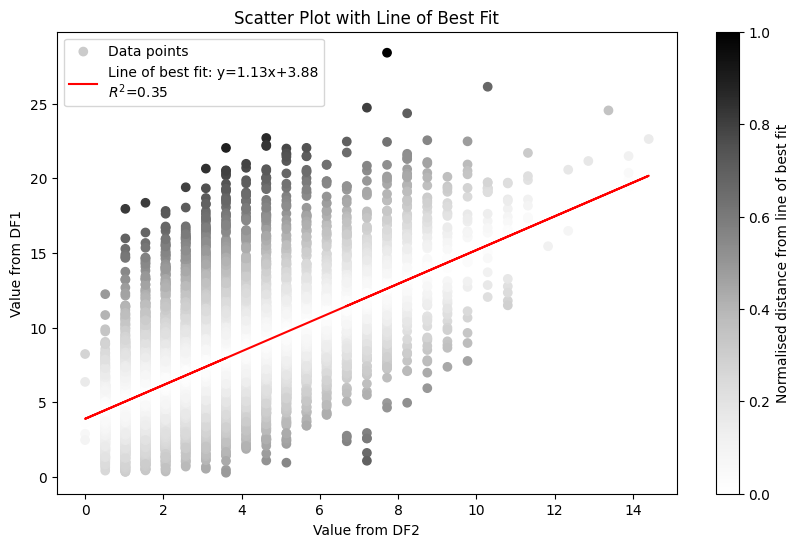

In [ ]:
# import matplotlib.pyplot as plt

# inverted_norm_distances = 1 - norm_distances

# plt.figure(figsize=(10, 6))

# # Create scatter plot
# scatter = plt.scatter(x, y, c=norm_distances, cmap='Grays', label='Data points')

# # Add line of best fit
# plt.plot(x, slope*x + intercept, color='red', label=f'Line of best fit: y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_squared:.2f}')

# plt.xlabel('Value from DF2')
# plt.ylabel('Value from DF1')
# plt.title('Scatter Plot with Line of Best Fit')
# plt.colorbar(scatter, label='Normalised distance from line of best fit')
# plt.legend()
# plt.show()


In [47]:
def MCP_graph(df1, df2, df1_name, df2_name):

    common_start = max(df1.index.min(), df2.index.min())
    common_end = min(df1.index.max(), df2.index.max())

    df1_common = df1[common_start:common_end]
    df2_common = df2[common_start:common_end]

    df1_common = df1_common.dropna()
    df2_common = df2_common.dropna()

    aligned_df1, aligned_df2 = df1_common.align(df2_common, join='inner', axis=0)

    x = aligned_df2['mean_speed_ms']
    y = aligned_df1['mean_speed_ms']


    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2

    distances = distance_from_line(x, y, slope, intercept)

    # Normalize distances
    norm_distances = (distances - distances.min()) / (distances.max() - distances.min())

    plt.figure(figsize=(10, 6))

    # Create scatter plot

    #scatter = plt.scatter(x, y, label='Data points')

    scatter = plt.scatter(x, y, c=norm_distances, cmap='Grays', label='Data points')

    # Add line of best fit
    plt.plot(x, slope*x + intercept, color='red', label=f'Line of best fit: y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_squared:.2f}')

    plt.xlabel(f'{df2_name}')
    plt.ylabel(f'{df1_name}')
    plt.title(f'{df1_name} v {df2_name} Correlation, 2016/2017')
    plt.colorbar(scatter, label='Normalised distance from line of best fit')
    plt.legend()

    plt.savefig(f'{df1_name}_{df2_name}_2016_2017.png', dpi=300)

    plt.show()
    

    
    
#df_P_H

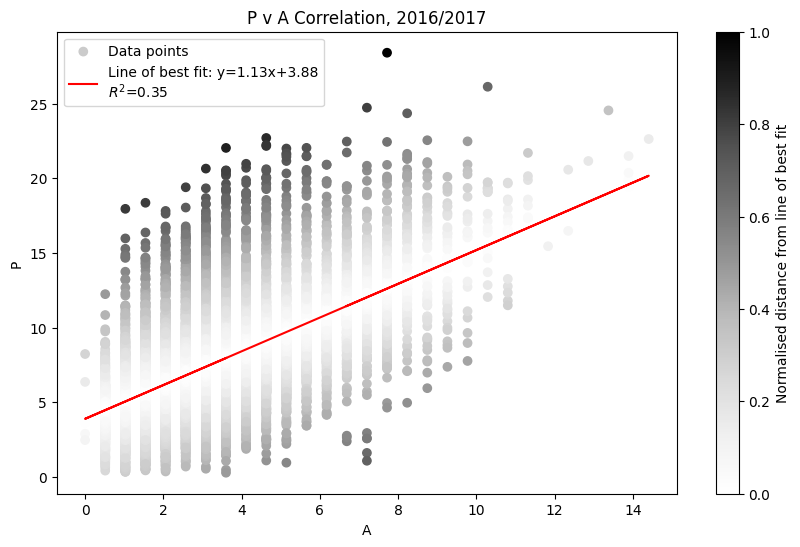

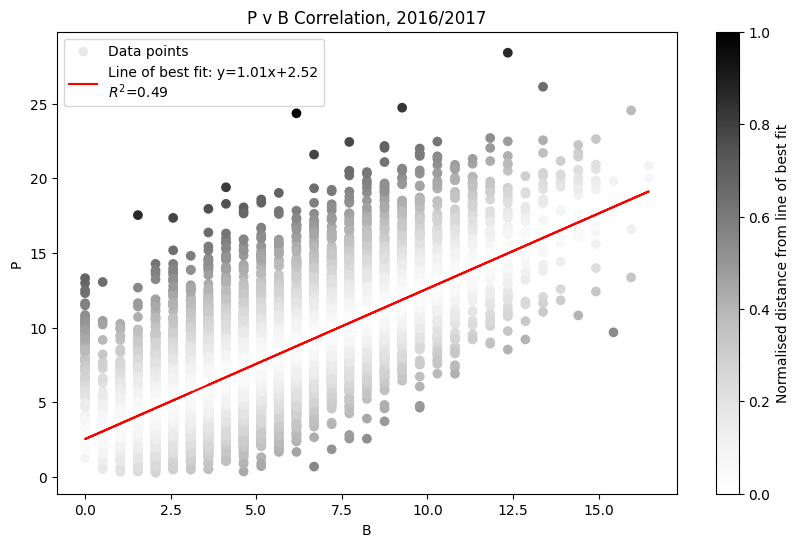

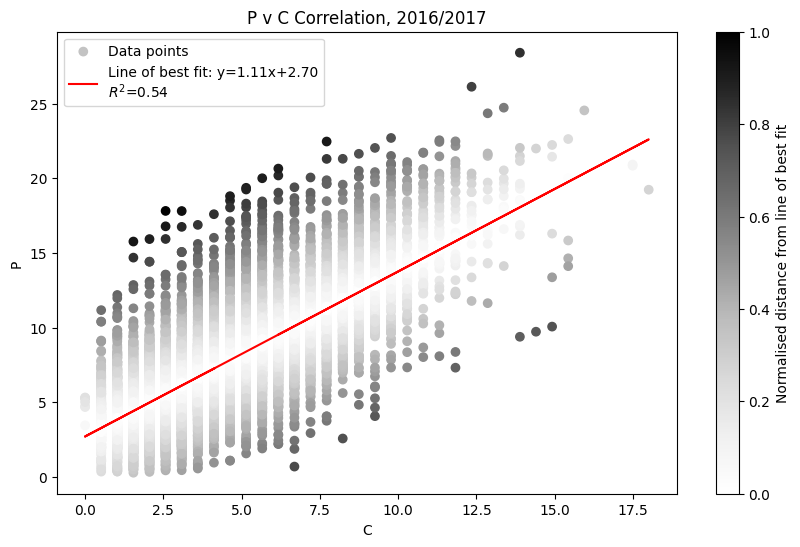

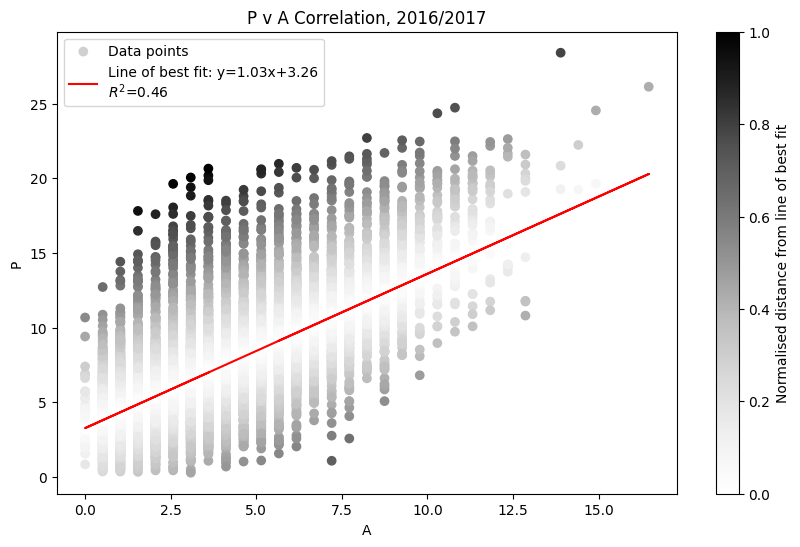

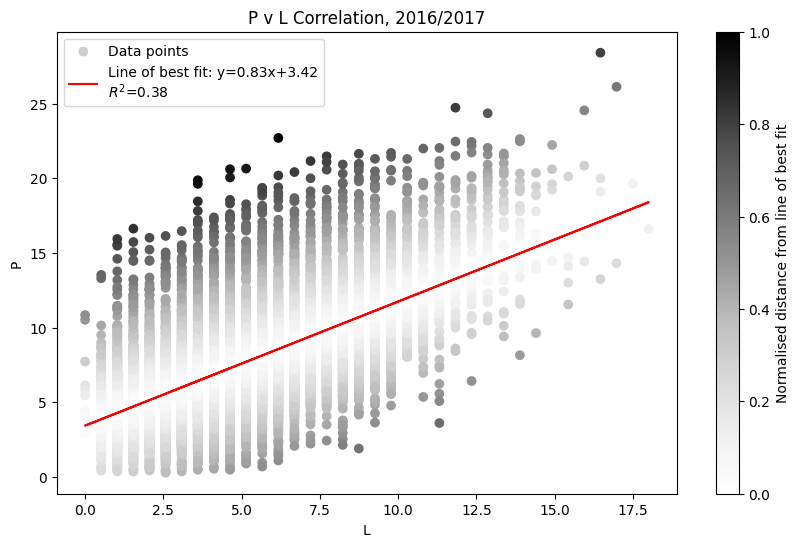

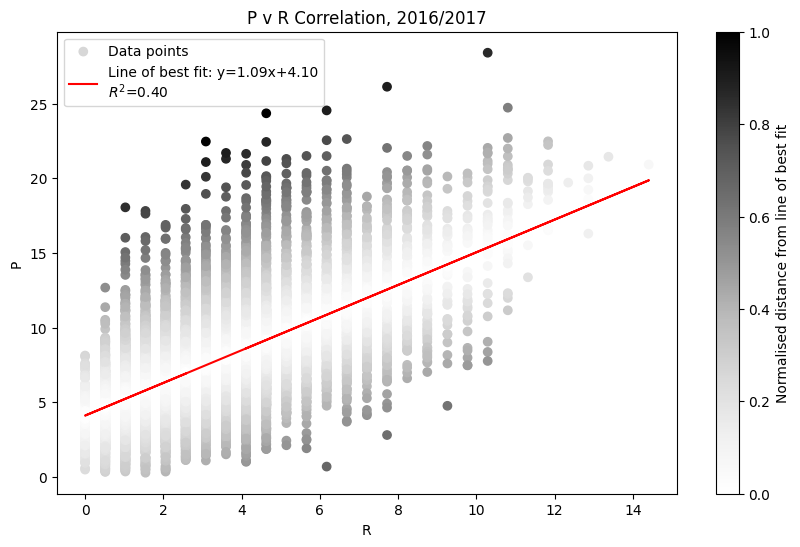

In [48]:
df_A_H = pandas.concat([df_A_2016, df_A_2017], axis = 0)
df_B_H = pandas.concat([df_B_2016, df_B_2017], axis = 0)
df_C_H = pandas.concat([df_C_2016, df_C_2017], axis = 0)
df_G_H = pandas.concat([df_G_2016, df_G_2017], axis = 0)
df_L_H = pandas.concat([df_L_2016, df_L_2017], axis = 0)
df_R_H = pandas.concat([df_R_2016, df_R_2017], axis = 0)




MCP_graph(df_P_H, df_A_H, 'P', 'A')
MCP_graph(df_P_H, df_B_H, 'P', 'B')
MCP_graph(df_P_H, df_C_H, 'P', 'C')
MCP_graph(df_P_H, df_G_H, 'P', 'A')
MCP_graph(df_P_H, df_L_H, 'P', 'L')
MCP_graph(df_P_H, df_R_H, 'P', 'R')
x



In [ ]:
df_P_H.columns

Index(['datetime', 'mean_speed_ms', 'speed_std', 'mean_wind_dir'], dtype='object')

In [ ]:
# characterise the wind at P

df_P_10mins = pandas.concat([df_P_2016, df_P_2017], axis = 0)


df_P_10mins['wind_dir_rounded'] = df_P_10mins['mean_wind_dir'].round()

dir_vcounts = df_P_10mins['wind_dir_rounded'].value_counts().reset_index(drop = False)

dir_vcounts

,wind_dir_rounded,count
0,203.0,589
1,198.0,583
2,208.0,581
3,200.0,579
4,201.0,576
...,...,...
356,94.0,53
357,90.0,51
358,70.0,50
359,91.0,50


In [ ]:
mean_speed_per_dir = df_P_10mins.groupby('wind_dir_rounded')['mean_speed_ms'].mean().reset_index()


merged_data = pandas.merge(dir_vcounts, mean_speed_per_dir, on='wind_dir_rounded')
merged_data

,wind_dir_rounded,count,mean_speed_ms
0,203.0,589,8.100017
1,198.0,583,7.807479
2,208.0,581,7.835818
3,200.0,579,7.752625
4,201.0,576,8.031302
...,...,...,...
356,94.0,53,5.034151
357,90.0,51,5.326275
358,70.0,50,4.968800
359,91.0,50,4.995000


In [ ]:
def get_cardinal_direction(degrees):
    if 0 <= degrees < 11.25 or 348.75 <= degrees <= 360:
        return 'N'
    elif 11.25 <= degrees < 33.75:
        return 'NNE'
    elif 33.75 <= degrees < 56.25:
        return 'NE'
    elif 56.25 <= degrees < 78.75:
        return 'ENE'
    elif 78.75 <= degrees < 101.25:
        return 'E'
    elif 101.25 <= degrees < 123.75:
        return 'ESE'
    elif 123.75 <= degrees < 146.25:
        return 'SE'
    elif 146.25 <= degrees < 168.75:
        return 'SSE'
    elif 168.75 <= degrees < 191.25:
        return 'S'
    elif 191.25 <= degrees < 213.75:
        return 'SSW'
    elif 213.75 <= degrees < 236.25:
        return 'SW'
    elif 236.25 <= degrees < 258.75:
        return 'WSW'
    elif 258.75 <= degrees < 281.25:
        return 'W'
    elif 281.25 <= degrees < 303.75:
        return 'WNW'
    elif 303.75 <= degrees < 326.25:
        return 'NW'
    elif 326.25 <= degrees < 348.75:
        return 'NNW'
    else:
        return 'Invalid'
    


In [ ]:
dir_vcounts = merged_data

dir_vcounts["Cardinal Direction"] = dir_vcounts['wind_dir_rounded'].apply(get_cardinal_direction)

dir_vcounts['count'] = (dir_vcounts['count']) / dir_vcounts['count'].sum() * 100

dir_vcounts

,wind_dir_rounded,count,mean_speed_ms,Cardinal Direction
0,203.0,0.724157,8.100017,SSW
1,198.0,0.716780,7.807479,SSW
2,208.0,0.714321,7.835818,SSW
3,200.0,0.711862,7.752625,SSW
4,201.0,0.708174,8.031302,SSW
...,...,...,...,...
356,94.0,0.065162,5.034151,E
357,90.0,0.062703,5.326275,E
358,70.0,0.061473,4.968800,ENE
359,91.0,0.061473,4.995000,E


In [ ]:
grouped_data = dir_vcounts.groupby('Cardinal Direction')['count'].sum().reset_index()

grouped_data = grouped_data.sort_values(by = 'count', ascending=False)

grouped_data['Mean Wind Speed'] = dir_vcounts["mean_speed_ms"]

grouped_data


,Cardinal Direction,count,Mean Wind Speed
11,SSW,14.417970,8.106611
13,W,12.732369,8.664572
15,WSW,12.319268,7.799925
12,SW,11.413150,8.059907
8,S,8.528819,7.901234
14,WNW,7.610406,8.970752
9,SE,6.260450,7.936148
10,SSE,5.637110,8.043895
3,N,3.679797,7.752625
7,NW,3.506442,7.811097


In [ ]:
import xlwings as xw

wb = xw.Book("Book1_WIND.xlsx")

sht = wb.sheets['wind_characterisation']

sht.range('I16').options(index=False, header=True).value = grouped_data

In [ ]:
fig = px.bar_polar(merged_data, r="count", theta='wind_dir_rounded',
                   color='mean_speed_ms',
                   template="none", barmode='relative',
                   color_continuous_scale=px.colors.sequential.Plasma_r,
                   barnorm="percent")

# Adjust the color bar position
fig.update_layout(coloraxis_colorbar=dict(
    x=0.73,  # Adjusts left-right position
    y=0.5,   # Adjusts top-bottom position
    len=0.75 # Adjusts the length of the color bar
))

fig.update_layout(title='Direction and Mean Windspeed Trend for Penmanshiel')


fig.write_image('testrose.png', scale=3)  # scale parameter controls the resolution

fig.show()

In [ ]:
mean_speed_per_dir = df_P_10mins.groupby('wind_dir_rounded')['mean_speed_ms'].mean().reset_index()
merged_data = pandas.merge(dir_vcounts, mean_speed_per_dir, on='wind_dir_rounded')

# need to add turbulence intensity column